In [55]:
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install scipy


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [56]:
import pandas as pd
import glob
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats

Data Processing 

In [57]:
path = "C:/Users/user/Downloads/train.csv"
df = pd.read_csv(path)
df.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,depressed,absent,slight,slight,less_1_liter,6.5,decreased,distend_small,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,mild_pain,absent,moderate,none,more_1_liter,2.0,absent,distend_small,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,extreme_pain,hypomotile,moderate,slight,none,3.5,NaN,distend_large,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,mild_pain,hypomotile,moderate,slight,more_1_liter,2.0,decreased,distend_small,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,alert,hypomotile,none,slight,less_1_liter,7.0,normal,normal,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [58]:
# Remove id and hospital number column
df = df.drop(['id','hospital_number'], axis=1)
df.head()




,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,yes,adult,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,depressed,absent,slight,slight,less_1_liter,6.5,decreased,distend_small,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,yes,adult,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,mild_pain,absent,moderate,none,more_1_liter,2.0,absent,distend_small,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,yes,adult,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,extreme_pain,hypomotile,moderate,slight,none,3.5,NaN,distend_large,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,yes,adult,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,mild_pain,hypomotile,moderate,slight,more_1_liter,2.0,decreased,distend_small,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,no,adult,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,alert,hypomotile,none,slight,less_1_liter,7.0,normal,normal,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [59]:
print(df.dtypes)

# Iterate over each column in the DataFrame
for column in df.columns:
    # Get unique values from the column
    unique_values = df[column].unique()
    # Print the column name and its unique values
    print(f"Column '{column}' has unique values: {unique_values}")

# Checking for missing values in the dataset
missing_data = df.isnull().sum()
missing_data 


surgery                   object
age                       object
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
nasogastric_tube          object
nasogastric_reflux        object
nasogastric_reflux_ph    float64
rectal_exam_feces         object
abdomen                   object
packed_cell_volume       float64
total_protein            float64
abdomo_appearance         object
abdomo_protein           float64
surgical_lesion           object
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
cp_data                   object
outcome                   object
dtype: object
Column 'surgery' has unique values: ['yes' 'no']
Column 'age' has unique values: ['adult' 'youn

surgery                    0
age                        0
rectal_temp                0
pulse                      0
respiratory_rate           0
temp_of_extremities       39
peripheral_pulse          60
mucous_membrane           21
capillary_refill_time      6
pain                      44
peristalsis               20
abdominal_distention      23
nasogastric_tube          80
nasogastric_reflux        21
nasogastric_reflux_ph      0
rectal_exam_feces        190
abdomen                  213
packed_cell_volume         0
total_protein              0
abdomo_appearance         48
abdomo_protein             0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
outcome                    0
dtype: int64

In [60]:
# Replace 'none' in any case with NaN across the DataFrame using a case-insensitive regex
df.replace(to_replace=[r'(?i)^none$'], value=np.nan, regex=True, inplace=True)

# Check for missing values
missing_data = df.isnull().sum()
print(missing_data)

surgery                    0
age                        0
rectal_temp                0
pulse                      0
respiratory_rate           0
temp_of_extremities       39
peripheral_pulse          60
mucous_membrane           21
capillary_refill_time      6
pain                      44
peristalsis               20
abdominal_distention     235
nasogastric_tube         355
nasogastric_reflux       352
nasogastric_reflux_ph      0
rectal_exam_feces        190
abdomen                  213
packed_cell_volume         0
total_protein              0
abdomo_appearance         48
abdomo_protein             0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
outcome                    0
dtype: int64


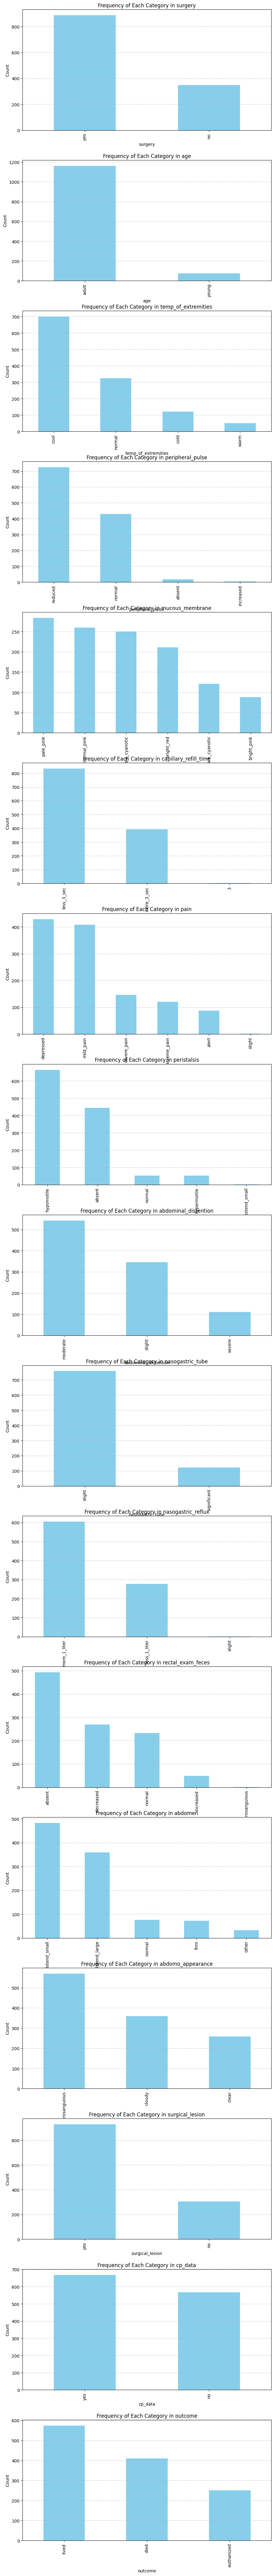

In [61]:
# Select columns of type 'object'
categorical_columns = df.select_dtypes(include=['object']).columns

# Set up the plotting
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(10, 5 * len(categorical_columns)))
fig.tight_layout(pad=5.0)

# Check if there's only one categorical column, handle subplot axes indexing
if len(categorical_columns) == 1:
    axes = [axes]  # Make it iterable

# Loop through each categorical column, plotting its value counts
for ax, column in zip(axes, categorical_columns):
    value_counts = df[column].value_counts()
    value_counts.plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(f'Frequency of Each Category in {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [62]:
# Iterate over each column in the DataFrame
for column in df.select_dtypes(include='object').columns:
    df[column] = df[column].astype('category')

# Identify categorical columns excluding the target variable 'outcome'
categorical_cols = df.select_dtypes(include=['category']).columns.drop('outcome')

# Apply one-hot encoding to all categorical columns
df_encoded = pd.get_dummies(df, columns= categorical_cols)

# Ensure the target 'outcome' is kept as a categorical type and not encoded
df['outcome'] = df['outcome'].astype('category')

# Display the new DataFrame to verify changes
df_encoded.head()


,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3,outcome,surgery_no,surgery_yes,age_adult,age_young,temp_of_extremities_cold,temp_of_extremities_cool,temp_of_extremities_normal,temp_of_extremities_warm,peripheral_pulse_absent,peripheral_pulse_increased,peripheral_pulse_normal,peripheral_pulse_reduced,mucous_membrane_bright_pink,mucous_membrane_bright_red,mucous_membrane_dark_cyanotic,mucous_membrane_normal_pink,mucous_membrane_pale_cyanotic,mucous_membrane_pale_pink,capillary_refill_time_3,capillary_refill_time_less_3_sec,capillary_refill_time_more_3_sec,pain_alert,pain_depressed,pain_extreme_pain,pain_mild_pain,pain_severe_pain,pain_slight,peristalsis_absent,peristalsis_distend_small,peristalsis_hypermotile,peristalsis_hypomotile,peristalsis_normal,abdominal_distention_moderate,abdominal_distention_severe,abdominal_distention_slight,nasogastric_tube_significant,nasogastric_tube_slight,nasogastric_reflux_less_1_liter,nasogastric_reflux_more_1_liter,nasogastric_reflux_slight,rectal_exam_feces_absent,rectal_exam_feces_decreased,rectal_exam_feces_increased,rectal_exam_feces_normal,rectal_exam_feces_serosanguious,abdomen_distend_large,abdomen_distend_small,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_clear,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,surgical_lesion_no,surgical_lesion_yes,cp_data_no,cp_data_yes
0,38.1,132.0,24.0,6.5,57.0,8.5,3.4,2209,0,0,died,False,True,True,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,True,True,False
1,37.5,88.0,12.0,2.0,33.0,64.0,2.0,2208,0,0,euthanized,False,True,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,True,True,False
2,38.3,120.0,28.0,3.5,37.0,6.4,3.4,5124,0,0,lived,False,True,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,True,False
3,37.1,72.0,30.0,2.0,53.0,7.0,3.9,2208,0,0,lived,False,True,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,True,False,True,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,True
4,38.0,52.0,48.0,7.0,47.0,7.3,2.6,0,0,0,lived,True,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,True,False,False,True


In [63]:
# Adjust display settings to show more information
pd.set_option('display.max_rows', None)  # To display all rows if necessary
pd.set_option('display.max_columns', None)  # To display all columns
pd.set_option('display.width', None)  # To remove limit on the display width

#Check the data types of the new DataFrame
print(df_encoded.dtypes)


rectal_temp                          float64
pulse                                float64
respiratory_rate                     float64
nasogastric_reflux_ph                float64
packed_cell_volume                   float64
total_protein                        float64
abdomo_protein                       float64
lesion_1                               int64
lesion_2                               int64
lesion_3                               int64
outcome                             category
surgery_no                              bool
surgery_yes                             bool
age_adult                               bool
age_young                               bool
temp_of_extremities_cold                bool
temp_of_extremities_cool                bool
temp_of_extremities_normal              bool
temp_of_extremities_warm                bool
peripheral_pulse_absent                 bool
peripheral_pulse_increased              bool
peripheral_pulse_normal                 bool
peripheral

In [64]:
#Scale numercial variables
from sklearn.preprocessing import StandardScaler

# Identify numerical columns (int64 and float64)
numerical_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the numerical features
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

df = df_encoded
df.head()
df.shape



(1235, 68)

Feature Selection

Feature importance by random forest

                             feature  importance
5                      total_protein    0.092474
1                              pulse    0.069426
6                     abdomo_protein    0.063685
3              nasogastric_reflux_ph    0.063579
4                 packed_cell_volume    0.058897
7                           lesion_1    0.051019
0                        rectal_temp    0.048230
2                   respiratory_rate    0.044230
34                    pain_mild_pain    0.029616
62   abdomo_appearance_serosanguious    0.019810
50          rectal_exam_feces_absent    0.017249
21          peripheral_pulse_reduced    0.016363
20           peripheral_pulse_normal    0.015729
25       mucous_membrane_normal_pink    0.015692
16        temp_of_extremities_normal    0.015287
35                  pain_severe_pain    0.015176
64               surgical_lesion_yes    0.014119
29  capillary_refill_time_less_3_sec    0.014065
60           abdomo_appearance_clear    0.013767
10                  

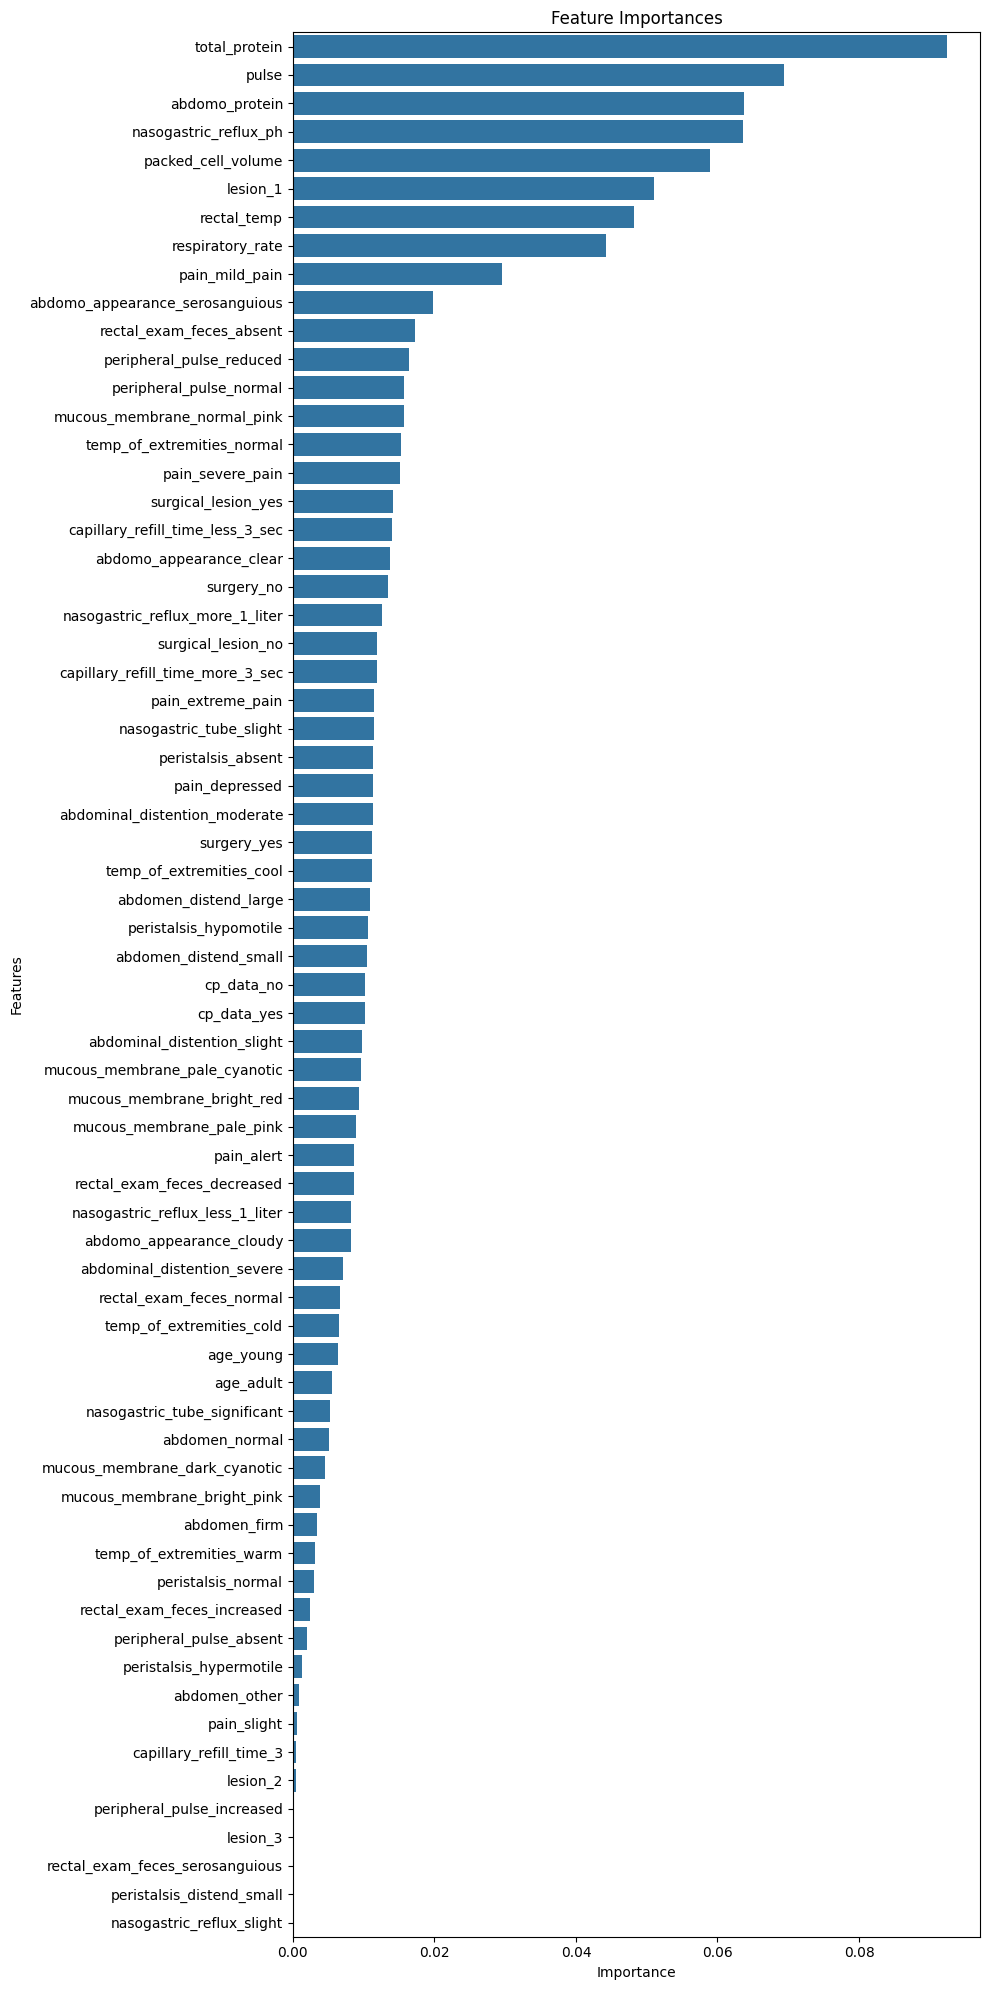

In [83]:
from sklearn.ensemble import RandomForestClassifier
import random

X = df.drop('outcome', axis=1)
y = df['outcome']

#random.seed(234567)

# Train a model
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': model.feature_importances_})
feature_importances.sort_values(by='importance', ascending=False, inplace=True)
print(feature_importances)

plt.figure(figsize=(10, 20))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')

# Annotate the bars with the importance values
for index, value in enumerate(feature_importances['importance']):
    ax.text(value, index, f'{value:.4f}', va='center')  # Display importance value on the bar

plt.tight_layout()
plt.show()

Recursive Feature Elimination

In [84]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df.drop(columns='outcome')
y = df['outcome']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Initialize RFE with the number of features to select (e.g., 10 most important features)
rfe = RFE(estimator=rf, n_features_to_select=25)

# Fit the RFE model
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

# Train the RandomForest model with only the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

rf.fit(X_train_selected, y_train)

# Make predictions and evaluate the model
y_pred = rf.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with selected features: {accuracy:.4f}")


Selected Features: Index(['rectal_temp', 'pulse', 'respiratory_rate', 'nasogastric_reflux_ph',
       'packed_cell_volume', 'total_protein', 'abdomo_protein', 'lesion_1',
       'surgery_yes', 'temp_of_extremities_cool', 'peripheral_pulse_reduced',
       'capillary_refill_time_less_3_sec', 'capillary_refill_time_more_3_sec',
       'pain_mild_pain', 'pain_severe_pain', 'abdominal_distention_moderate',
       'nasogastric_tube_slight', 'nasogastric_reflux_more_1_liter',
       'rectal_exam_feces_absent', 'abdomen_distend_large',
       'abdomo_appearance_clear', 'abdomo_appearance_serosanguious',
       'surgical_lesion_no', 'surgical_lesion_yes', 'cp_data_no'],
      dtype='object')
Accuracy with selected features: 0.7251


CatBoost

In [85]:
!pip install catboost


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [86]:
original_df = "C:/Users/user/Downloads/train.csv"
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load your dataset (assuming 'df' is a pandas DataFrame and 'outcome' is the target variable)
X = df.drop(columns='outcome')  # Features
y = df['outcome']  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Specify the column indices of categorical features (optional)
categorical_features_indices = [i for i, col in enumerate(X.columns) if X[col].dtype == 'object']

# Initialize CatBoostClassifier
# catboost_model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, 
#                                    cat_features=categorical_features_indices, verbose=100)
catboost_model = CatBoostClassifier(iterations=1000, learning_rate=0.01, depth=6, 
                                    cat_features=categorical_features_indices, verbose=100)

# Train the model
catboost_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = catboost_model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Get feature importance scores from the CatBoost model
catboost_importances = catboost_model.get_feature_importance()

# Create a DataFrame with features and their importance scores
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': catboost_importances
})

# Sort features by importance in descending order
feature_importances.sort_values(by='importance', ascending=False, inplace=True)

# Print the feature importances
print("CatBoost Selected Features and their Importance Scores:")
print(feature_importances)

0:	learn: 1.0936990	total: 3.73ms	remaining: 3.72s
100:	learn: 0.8219915	total: 445ms	remaining: 3.96s
200:	learn: 0.7129675	total: 940ms	remaining: 3.74s
300:	learn: 0.6475615	total: 1.39s	remaining: 3.22s
400:	learn: 0.6017777	total: 1.78s	remaining: 2.65s
500:	learn: 0.5664203	total: 2.25s	remaining: 2.24s
600:	learn: 0.5348092	total: 2.68s	remaining: 1.78s
700:	learn: 0.5071371	total: 3.07s	remaining: 1.31s
800:	learn: 0.4811407	total: 3.45s	remaining: 858ms
900:	learn: 0.4569972	total: 3.88s	remaining: 426ms
999:	learn: 0.4336993	total: 4.32s	remaining: 0us
Accuracy: 0.7385
CatBoost Selected Features and their Importance Scores:
                             feature  importance
5                      total_protein   11.511418
6                     abdomo_protein    7.989325
1                              pulse    7.358117
3              nasogastric_reflux_ph    6.800837
7                           lesion_1    5.779359
4                 packed_cell_volume    5.128174
2              

Take Average 

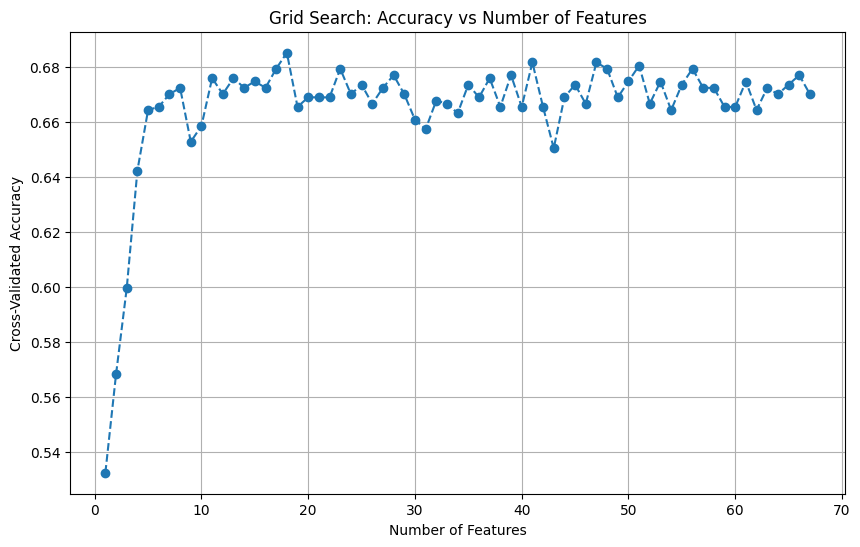

Optimal number of features: 18
Selected features: ['total_protein' 'pulse' 'abdomo_protein' 'nasogastric_reflux_ph'
 'packed_cell_volume' 'lesion_1' 'rectal_temp' 'respiratory_rate'
 'pain_mild_pain' 'rectal_exam_feces_absent' 'pain_severe_pain'
 'abdomo_appearance_serosanguious' 'surgical_lesion_yes'
 'nasogastric_reflux_more_1_liter' 'abdomo_appearance_clear'
 'surgical_lesion_no' 'surgery_yes' 'temp_of_extremities_cool']
Accuracy with selected features: 0.7089


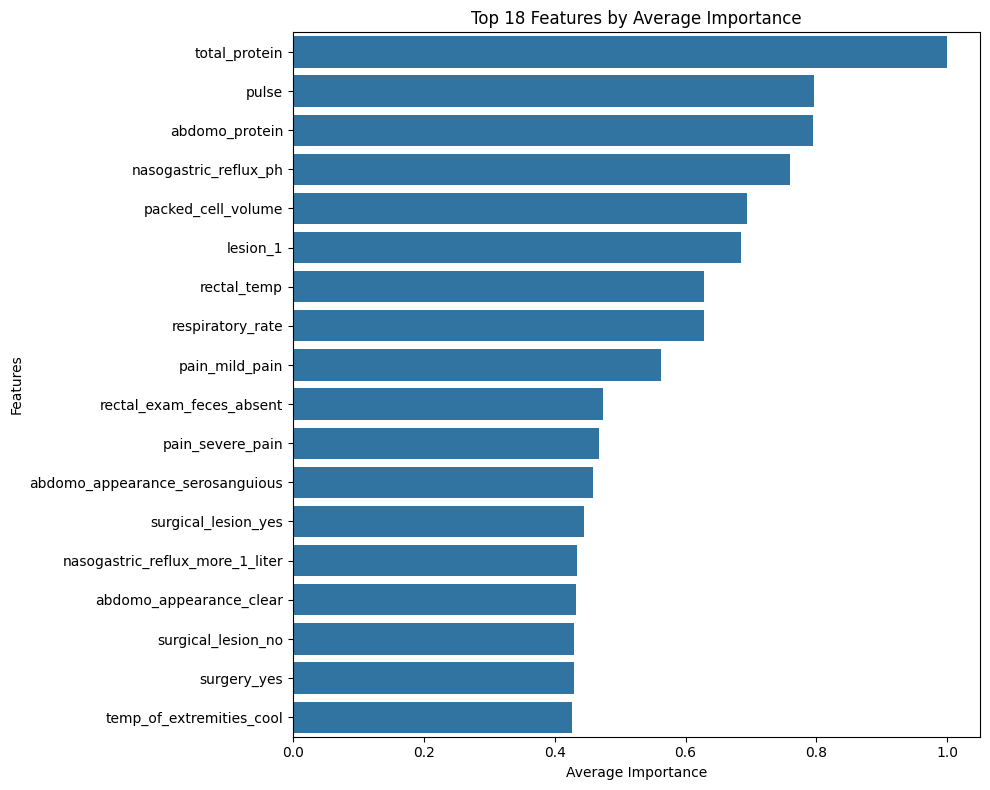

In [87]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Combine feature importance results into a DataFrame
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'rf_importance': model.feature_importances_,  # RandomForest feature importances from your code
    'rfe_importance': np.where(rfe.support_, 1, 0),  # Convert RFE support into binary importances
    'catboost_importance': catboost_model.get_feature_importance()  # CatBoost feature importances
})

# Standardize feature importance scores (scale between 0 and 1)
scaler = MinMaxScaler()
feature_importances[['rf_importance', 'rfe_importance', 'catboost_importance']] = scaler.fit_transform(
    feature_importances[['rf_importance', 'rfe_importance', 'catboost_importance']]
)

# Combine the scores by averaging the importance from each method
feature_importances['average_importance'] = feature_importances[['rf_importance', 'rfe_importance', 'catboost_importance']].mean(axis=1)

# Sort by the combined average importance
feature_importances.sort_values(by='average_importance', ascending=False, inplace=True)

# Step 1: Initialize the classifier
rf = RandomForestClassifier(random_state=42)

# Step 2: Grid search to find the optimal number of features
# We'll loop through the top features from 1 to the total number of features and check the performance

accuracies = []
num_features_list = []

# Iterate over the top N features and evaluate performance using cross-validation
for N in range(1, len(feature_importances) + 1):
    # Select the top N features
    top_features = feature_importances['feature'].head(N)
    
    # Select only the top N features from the training data
    X_train_selected = X_train[top_features]
    
    # Perform cross-validation to evaluate the accuracy with the top N features
    cv_scores = cross_val_score(rf, X_train_selected, y_train, cv=5, scoring='accuracy')
    mean_cv_score = np.mean(cv_scores)
    
    # Store the results
    accuracies.append(mean_cv_score)
    num_features_list.append(N)

# Step 3: Plot Accuracy vs Number of Features
plt.figure(figsize=(10, 6))
plt.plot(num_features_list, accuracies, marker='o', linestyle='--')
plt.title('Grid Search: Accuracy vs Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Cross-Validated Accuracy')
plt.grid(True)
plt.show()

# Step 4: Choose the optimal number of features (based on max accuracy)
optimal_num_features = num_features_list[np.argmax(accuracies)]
print(f"Optimal number of features: {optimal_num_features}")

# Select the optimal features
top_features_optimal = feature_importances['feature'].head(optimal_num_features)

top_features_15 = feature_importances['feature'].head(15)

print(f"Selected features: {top_features_optimal.values}")

# Step 5: Train RandomForest using only the selected optimal number of features
X_train_selected = X_train[top_features_optimal]
X_test_selected = X_test[top_features_optimal]

# Fit the model
rf_selected = RandomForestClassifier(random_state=42)
rf_selected.fit(X_train_selected, y_train)

# Make predictions and validate the model
y_pred = rf_selected.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with selected features: {accuracy:.4f}")

# Step 6: Visualize the top selected features' average importance
plt.figure(figsize=(10, 8))
sns.barplot(x='average_importance', y='feature', data=feature_importances.head(optimal_num_features))
plt.title(f'Top {optimal_num_features} Features by Average Importance')
plt.xlabel('Average Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()





In [88]:
# Select the top features from the original dataset
df_selected_features = df[top_features_optimal]

#df_selected_features = df[top_features_15]

df_selected_features['outcome'] = df['outcome']

df_selected_features.head()

C:\Users\user\AppData\Local\Temp\ipykernel_27800\3626179516.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_features['outcome'] = df['outcome']


,total_protein,pulse,abdomo_protein,nasogastric_reflux_ph,packed_cell_volume,lesion_1,rectal_temp,respiratory_rate,pain_mild_pain,rectal_exam_feces_absent,pain_severe_pain,abdomo_appearance_serosanguious,surgical_lesion_yes,nasogastric_reflux_more_1_liter,abdomo_appearance_clear,surgical_lesion_no,surgery_yes,temp_of_extremities_cool,outcome
0,-0.483319,1.801773,0.068659,1.093380,0.702421,-0.298737,-0.129621,-0.368142,False,False,False,True,True,False,False,False,True,True,died
1,1.598010,0.289582,-0.812647,-1.230314,-1.576449,-0.298921,-0.890705,-1.097830,True,True,False,True,True,True,False,False,True,True,euthanized
2,-0.562072,1.389357,0.068659,-0.455749,-1.196638,0.237648,0.124074,-0.124913,False,False,False,True,True,False,False,False,True,True,lived
3,-0.539571,-0.260306,0.383411,-1.230314,0.322609,-0.298921,-1.398095,-0.003299,True,False,False,False,True,True,False,False,True,False,lived
4,-0.528321,-0.947666,-0.434944,1.351568,-0.247108,-0.705212,-0.256468,1.091232,False,False,False,False,False,False,False,True,False,False,lived


Machine Learning Models

Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the data into features (X) and target (y)
X = df_selected_features.drop(columns=['outcome'])  
y = df_selected_features['outcome'] 

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report for detailed performance metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.6873
Classification Report:
              precision    recall  f1-score   support

        died       0.62      0.75      0.68       110
  euthanized       0.71      0.43      0.53        82
       lived       0.73      0.77      0.75       179

    accuracy                           0.69       371
   macro avg       0.69      0.65      0.65       371
weighted avg       0.69      0.69      0.68       371



C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVM

In [90]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming 'df_selected_features' contains the selected features and the 'outcome' column as the target
# Example: df_selected_features['outcome'] is the target variable and other columns are features

# Step 1: Data Preparation
X = df_selected_features.drop(columns=['outcome'])  # Independent variables (selected features)
y = df_selected_features['outcome']  # Dependent variable (target)

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Initialize the SVM model
# Here we use a linear kernel, but we can optimize this later using GridSearchCV
svm_model = SVC(kernel='linear', decision_function_shape='ovr', random_state=42)

# Step 3: Train the SVM model
svm_model.fit(X_train_scaled, y_train)

# Step 4: Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report for detailed performance metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.6469
Classification Report:
              precision    recall  f1-score   support

        died       0.55      0.70      0.62       110
  euthanized       0.76      0.35      0.48        82
       lived       0.69      0.75      0.72       179

    accuracy                           0.65       371
   macro avg       0.67      0.60      0.61       371
weighted avg       0.67      0.65      0.64       371



KNN

In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'df_selected_features' contains the selected features and the 'outcome' column as the target
# Example: df_selected_features['outcome'] is the target variable and other columns are features

# Step 1: Data Preparation
X = df_selected_features.drop(columns=['outcome'])  # Independent variables (selected features)
y = df_selected_features['outcome']  # Dependent variable (target)

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Feature Scaling (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Initialize the KNN model
# Start with k=5 (you can tune this later)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Step 4: Train the KNN model
knn_model.fit(X_train_scaled, y_train)

# Step 5: Make predictions on the test set
y_pred = knn_model.predict(X_test_scaled)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report for detailed performance metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.6577
Classification Report:
              precision    recall  f1-score   support

        died       0.55      0.72      0.62       110
  euthanized       0.68      0.46      0.55        82
       lived       0.74      0.71      0.73       179

    accuracy                           0.66       371
   macro avg       0.66      0.63      0.63       371
weighted avg       0.67      0.66      0.66       371



Random Forest

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Assuming 'df_selected_features' contains the selected features and the 'outcome' column as the target
# Example: df_selected_features['outcome'] is the target variable and other columns are features

# Step 1: Data Preparation
X = df_selected_features.drop(columns=['outcome'])  # Independent variables (selected features)
y = df_selected_features['outcome']  # Dependent variable (target)

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Initialize the Random Forest model
# You can start with default parameters and tune them later
rf_model = RandomForestClassifier(random_state=42)

# Step 3: Train the Random Forest model
rf_model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report for detailed performance metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7089
Classification Report:
              precision    recall  f1-score   support

        died       0.63      0.67      0.65       110
  euthanized       0.80      0.57      0.67        82
       lived       0.73      0.79      0.76       179

    accuracy                           0.71       371
   macro avg       0.72      0.68      0.69       371
weighted avg       0.72      0.71      0.71       371



In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Assuming 'df_selected_features' contains the selected features and the 'outcome' column as the target

# Step 1: Data Preparation
X = df_selected_features.drop(columns=['outcome'])  # Independent variables (selected features)
y = df_selected_features['outcome']  # Dependent variable (target)

# Feature Scaling (optional for RandomForest, but useful for comparison with other models)
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)





# Step 2: Initialize RandomForestClassifier with hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Max depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]        # Method of selecting samples for training each tree
}

# GridSearchCV for hyperparameter tuning
# Define a custom class weight dictionary




rf_model = RandomForestClassifier(random_state=42, class_weight="balanced")
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=2)

# Step 3: Train the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
best_rf_model = grid_search.best_estimator_

# Step 4: Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report for detailed performance metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 6: Cross-validation (for more reliable accuracy estimate)
cv_scores = cross_val_score(best_rf_model, X, y, cv=10, scoring='accuracy')
print(f"Cross-Validated Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Accuracy: 0.7062
Classification Report:
              precision    recall  f1-score   support

        died       0.63      0.67      0.65       110
  euthanized       0.71      0.63      0.67        82
       lived       0.76      0.76      0.76       179

    accuracy                           0.71       371
   macro avg       0.70      0.69      0.69       371
weighted avg       0.71      0.71      0.71       371

Cross-Validated Accuracy: 0.6972 ± 0.0398
